In [46]:

data=pd.read_csv("/content/Churn_Modelling.csv")


In [47]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns


In [48]:
df=data.head(10)

Univarient analysis

<BarContainer object of 10 artists>

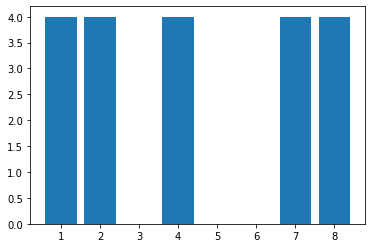

In [49]:
import matplotlib.pyplot as plt
plt.bar (df['Tenure'],4)

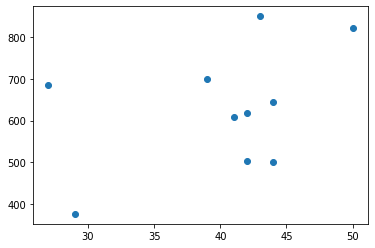

In [50]:
plt.scatter(df['Age'],df['CreditScore'])

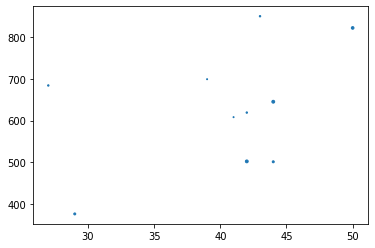

In [51]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

In [52]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


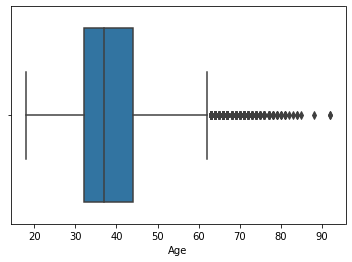

In [54]:
sns.boxplot(data['Age'])

In [55]:
q=data.quantile(q=[0.75,0.5])

In [56]:
iqr=q.iloc[0]-q.iloc[1]

In [57]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [58]:
l=q.iloc[1]-(1.5*iqr)

In [59]:
l['Age']

26.5

In [60]:
u=q.iloc[1]+(1.5*iqr)
u['Age']

47.5

In [61]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


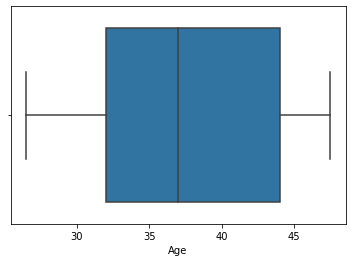

In [62]:
sns.boxplot(data['Age'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [64]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [65]:
le=LabelEncoder()

In [66]:
data['Surname']=le.fit_transform(data['Surname'])

In [67]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [68]:
data['Geography']=le.fit_transform(data['Geography'])


In [69]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])


In [70]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52,1


In [71]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52


In [72]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [73]:
from sklearn.preprocessing import scale


In [74]:
scale(x)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [77]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5860,5861,15723818,410,453,0,1,37.0,4,131834.76,2,1,0,8949.20
4904,4905,15678720,833,741,0,1,44.0,7,0.00,2,1,1,190534.76
6696,6697,15587299,275,567,0,1,47.5,3,0.00,1,1,0,55362.45
6674,6675,15759034,1550,654,0,0,36.0,2,112262.84,1,1,0,12873.39
4565,4566,15773779,1311,593,2,1,46.0,2,76597.79,1,1,1,54453.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,7029,15618410,1888,718,1,0,26.5,7,147527.03,1,0,0,51099.56
6101,6102,15588695,2541,833,2,0,32.0,6,0.00,1,1,1,44323.22
9136,9137,15688984,216,595,0,0,26.5,4,95830.43,1,1,0,177738.98
7129,7130,15781875,1314,850,2,0,33.0,3,100476.46,2,1,1,136539.13


In [78]:
x_train.shape

(8000, 13)

In [79]:
y_train

5860    0
4904    0
6696    0
6674    0
4565    0
       ..
7028    0
6101    1
9136    0
7129    0
8579    0
Name: Exited, Length: 8000, dtype: int64

In [80]:
y_train.shape

(8000,)

In [81]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6320,6321,15673599,2825,618,2,0,32.0,5,133476.09,1,0,1,154843.40
1802,1803,15779247,2098,683,2,1,26.5,8,98567.10,1,1,0,187987.01
8162,8163,15647333,900,621,0,0,27.0,4,137003.68,1,1,0,21254.06
8563,8564,15728838,1526,578,0,0,45.0,1,148600.91,1,1,0,143397.14
6263,6264,15745826,682,445,0,0,37.0,3,0.00,2,1,1,180012.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1542,15812497,658,654,1,0,37.0,5,112146.12,1,1,0,75927.35
2040,2041,15626684,1238,547,0,1,38.0,5,167539.97,1,0,1,159207.34
938,939,15668032,348,577,0,1,37.0,4,0.00,1,1,1,79881.39
7823,7824,15616029,14,705,0,0,32.0,7,0.00,2,1,0,7921.57


In [82]:
x_test.shape

(2000, 13)

In [83]:
y_test

6320    0
1802    0
8162    0
8563    1
6263    0
       ..
1541    0
2040    0
938     0
7823    0
8474    0
Name: Exited, Length: 2000, dtype: int64

In [84]:
y_test.shape

(2000,)